In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [2]:
# bases do CNES
CNES = pd.read_csv('tbEstabelecimento202305.csv',low_memory=False, encoding="ISO-8859-1", sep=';')

### obtendo CNES da paraíba(estado 25)

In [3]:
cnes_paraiba = CNES.loc[CNES["CO_ESTADO_GESTOR"]==25]
cnes_paraiba.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,TP_ESTAB_SEMPRE_ABERTO,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO
8933,2513606821774,6821774,8.942211e+12,3,3,MUNICIPIO DE SANTANA DOS GARROTES,UNIDADE DE VIGILANCIA SANITARIA,RUA JOAO ARAUJO FONSECA,S/N,CASA,...,N,NaN,S,NaN,NaN,M,12/08/2011,13.0,21.0,NaN
361301,2503209417753,9417753,NaN,3,1,FRANCISCO RUFINO DE LUCENA SEGUNDO EIRELI ME,CABEDELO ODONTO,AV DUQUE DE CAXIAS,39,SALA 106,...,N,NaN,S,NaN,NaN,M,04/02/2018,16.0,1.0,NaN
201276,2513100939609,939609,9.072463e+12,3,3,MUNICIPIO DE SALGADO DE SAO FELIX,CENTRO DE ESPECIALIDADE ODONTOLOGICAS SALGADO ...,RUA,S/N,CASA,...,N,NaN,S,NaN,NaN,M,11/11/2021,16.0,1.0,N
4222,2500902612577,2612577,8.778755e+12,3,3,PREFEITURA MUNICIPAL DE ARARA,UNIDADE DE SAUDE DA FAMILIA II,RUA SENADOR RUI CARNEIRO,S/N,NaN,...,N,NaN,N,NaN,NaN,M,16/10/2002,1.0,12.0,NaN
139703,2504707411510,7411510,8.870164e+12,3,3,PREFEITURA MUNICIPAL DO CONGO,NUCLEO DE APOIO A SAUDE DA FAMILIA,MINISTRO JOSE AMERICO,S/N,NaN,...,N,NaN,S,NaN,NaN,M,17/01/2014,13.0,16.0,S


In [4]:
cnes_paraiba.columns

Index(['CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA', 'TP_PFPJ', 'NIVEL_DEP',
       'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'NO_LOGRADOURO', 'NU_ENDERECO',
       'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP', 'CO_REGIAO_SAUDE',
       'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_USUARIO_GEO',
       'CO_NATUREZA_JUR', 'TP_ESTAB_SEMPRE_ABERTO',
       'ST_GERACREDITO_GERENTE_SGIF', 'ST_CONEXAO_INTERNET', 'CO_TIPO_UNIDADE',
       'NO_FANTASIA_ABREV',

### Malha de setores censitarios

<Axes: >

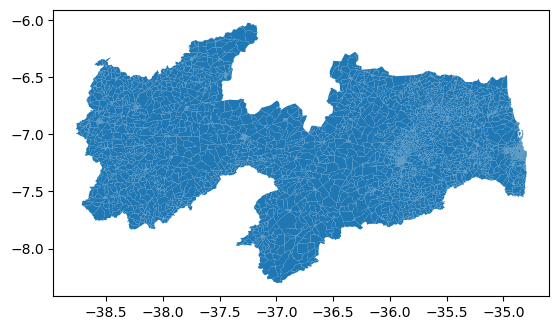

In [5]:
setores_pb = gpd.read_file("PB_Setores_2021.shp")
setores_pb.plot()

In [6]:
setores_pb.columns

Index(['CD_SETOR', 'CD_SIT', 'NM_SIT', 'CD_UF', 'NM_UF', 'SIGLA_UF', 'CD_MUN',
       'NM_MUN', 'CD_DIST', 'NM_DIST', 'CD_SUBDIST', 'NM_SUBDIST', 'geometry'],
      dtype='object')

### Transformando DataFrame em GeoDataFrame

In [9]:
# Converter as colunas 'NU_LATITUDE' e 'NU_LONGITUDE' para tipo numérico
latitudes = cnes_paraiba.loc['NU_LATITUDE'] = pd.to_numeric(cnes_paraiba['NU_LATITUDE'], errors='coerce')
longitudes = cnes_paraiba.loc['NU_LONGITUDE'] = pd.to_numeric(cnes_paraiba['NU_LONGITUDE'], errors='coerce')

In [10]:
geometry = [Point(xy) for xy in zip(longitudes,latitudes)]

In [11]:
cnes_gdf = gpd.GeoDataFrame(cnes_paraiba, geometry = geometry, crs = setores_pb.crs)

In [12]:
cnes_gdf.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,geometry
6085,2504009376429,9376429.0,NaN,3.0,1.0,CENTRO DE ENDOCRINOLOGIA E METABOLOGIA LTDA EPP,PRO SANGUE DIAGNOSTICO,RUA CAMPOS SALES,463,LETRA B,...,NaN,S,NaN,NaN,M,28/11/2017,18.0,2.0,NaN,POINT (-35.87270 -7.22405)
87637,2502702591812,2591812.0,9.070400e+12,3.0,3.0,PREFEITURA MUNICIPAL DE BORBOREMA,MINI POSTO MANITU,SITIO MANITU,30,NaN,...,NaN,N,NaN,NaN,M,05/06/2002,1.0,12.0,NaN,POINT (-35.62600 -6.80100)
353569,2504007524382,7524382.0,NaN,1.0,1.0,DANIELLE JAMYLA BARBOSA RIBEIRO,CONSULTORIO DE HEMATOLOGIA,AV PEDRO II,407,SL 307,...,NaN,S,NaN,NaN,M,01/07/2014,16.0,1.0,NaN,POINT (-35.89091 -7.21999)
316326,2511602613239,2613239.0,8.786626e+12,3.0,3.0,PREFEITURA MUNICIPAL DE PILOES,UNIDADE BASICA DE SAUDE PSF I,RUA HUGO CUNHA,25,NaN,...,NaN,S,NaN,NaN,M,16/10/2002,1.0,12.0,NaN,POINT (-35.60859 -6.86494)
150705,2515976468357,6468357.0,1.612553e+12,3.0,3.0,MUNICIPIO DE SOBRADO,SECRETARIA MUNICIPAL DE SAUDE DE SOBRADO,RUA MANOEL DE SALES,S/N,NaN,...,NaN,S,NaN,NaN,M,30/03/2010,2.0,22.0,NaN,POINT (-35.23900 -7.14400)


# selecionado apenas o TP_UNIDADE 2 (UBS)

In [13]:
ubs = cnes_gdf[cnes_gdf["TP_UNIDADE"]==2]
ubs.sample(5)

,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,NO_COMPLEMENTO,...,ST_GERACREDITO_GERENTE_SGIF,ST_CONEXAO_INTERNET,CO_TIPO_UNIDADE,NO_FANTASIA_ABREV,TP_GESTAO,"TO_CHAR(DT_ATUALIZACAO_ORIGEM,'DD/MM/YYYY')",CO_TIPO_ESTABELECIMENTO,CO_ATIVIDADE_PRINCIPAL,ST_CONTRATO_FORMALIZADO,geometry
355092,2513852341816,2341816.0,1.612511e+12,3.0,3.0,MUNICIPIO DE SANTO ANDRE,UBSF LINA MARIA DE JESUS,RUA HUMBERTO MATIAS DE MEDEIROS,S/N,NaN,...,NaN,S,NaN,NaN,M,04/07/2003,1.0,12.0,NaN,POINT (-36.63116 -7.22142)
341572,2504032606275,2606275.0,1.612304e+12,3.0,3.0,PREFEITURA MUNICIPAL DE CAPIM,UNIDADE DE SAUDE ANILDA SOUTO ROCHA,RUA LUIZ VIEIRA,054,NaN,...,NaN,S,NaN,NaN,M,30/09/2002,1.0,12.0,NaN,POINT (-35.16870 -6.91194)
86215,2512705274834,5274834.0,9.048976e+12,3.0,3.0,PREFEITURA MUNICIPAL DE REMIGIO,UBSF V JAILZA MOREIRA GONCALVES,CONJUNTO MONSENHOR FIDELIS,S/N,NaN,...,NaN,N,NaN,NaN,M,04/03/2007,1.0,12.0,NaN,POINT (-35.80819 -6.97124)
280790,2504805730171,5730171.0,8.939936e+12,3.0,3.0,PREFEITURA MUNICIPAL DE COREMAS,RESIDENCIA TERAPEUTICA DE COREMAS,RUA JOAO FERNANDES DE LIMA,539,NaN,...,NaN,NaN,NaN,NaN,M,02/05/2008,NaN,NaN,NaN,POINT EMPTY
253496,2509202607212,2607212.0,8.739138e+12,3.0,3.0,MUNICIPIO DE MASSARANDUBA,UBS III CACHOEIRA DO GAMA,SITIO CACHOEIRA DA GAMA,S/N,NaN,...,NaN,S,NaN,NaN,M,30/09/2002,1.0,12.0,NaN,POINT (-35.78900 -7.20000)


### Geolocalização das unidades na malha de setores

<Axes: >

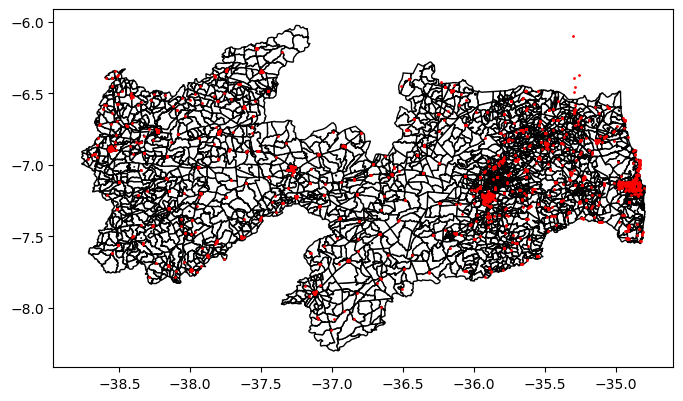

In [14]:
unidade = ubs[["CO_UNIDADE", "geometry"]]
fig, ax = plt.subplots(figsize = (8,8))
setores_pb.plot(ax = ax, color = "white", edgecolor = "black")
unidade.plot(ax = ax, markersize = 1, color = "r")

In [68]:
# Cruzamento dos geodaframes(dados das ubs e dos setores)
join = gpd.sjoin(ubs, setores_pb, how = "right" , predicate = "intersects" )

In [16]:
join.columns

Index(['index_left', 'CO_UNIDADE', 'CO_CNES', 'NU_CNPJ_MANTENEDORA', 'TP_PFPJ',
       'NIVEL_DEP', 'NO_RAZAO_SOCIAL', 'NO_FANTASIA', 'NO_LOGRADOURO',
       'NU_ENDERECO', 'NO_COMPLEMENTO', 'NO_BAIRRO', 'CO_CEP',
       'CO_REGIAO_SAUDE', 'CO_MICRO_REGIAO', 'CO_DISTRITO_SANITARIO',
       'CO_DISTRITO_ADMINISTRATIVO', 'NU_TELEFONE', 'NU_FAX', 'NO_EMAIL',
       'NU_CPF', 'NU_CNPJ', 'CO_ATIVIDADE', 'CO_CLIENTELA', 'NU_ALVARA',
       'DT_EXPEDICAO', 'TP_ORGAO_EXPEDIDOR', 'DT_VAL_LIC_SANI', 'TP_LIC_SANI',
       'TP_UNIDADE', 'CO_TURNO_ATENDIMENTO', 'CO_ESTADO_GESTOR',
       'CO_MUNICIPIO_GESTOR', 'TO_CHAR(DT_ATUALIZACAO,'DD/MM/YYYY')',
       'CO_USUARIO', 'CO_CPFDIRETORCLN', 'REG_DIRETORCLN',
       'ST_ADESAO_FILANTROP', 'CO_MOTIVO_DESAB', 'NO_URL', 'NU_LATITUDE',
       'NU_LONGITUDE', 'TO_CHAR(DT_ATU_GEO,'DD/MM/YYYY')', 'NO_USUARIO_GEO',
       'CO_NATUREZA_JUR', 'TP_ESTAB_SEMPRE_ABERTO',
       'ST_GERACREDITO_GERENTE_SGIF', 'ST_CONEXAO_INTERNET', 'CO_TIPO_UNIDADE',
       'NO_FA

In [27]:
# contagem de linhas e colunas depois do cruzamento
join.shape

(9670, 68)

In [18]:
# contagem dos setores
join.CD_SETOR.count()

9670

In [19]:
# contagem das unidades
join.CO_UNIDADE.count()

1516

In [74]:
# Algumas cidades não possui dados sobre UBS, isso pode significar que não possuem UBS naquele determinado setor
join[join.isnull().T.any()]

,index_left,CO_UNIDADE,CO_CNES,NU_CNPJ_MANTENEDORA,TP_PFPJ,NIVEL_DEP,NO_RAZAO_SOCIAL,NO_FANTASIA,NO_LOGRADOURO,NU_ENDERECO,...,CD_UF,NM_UF,SIGLA_UF,CD_MUN,NM_MUN,CD_DIST,NM_DIST,CD_SUBDIST,NM_SUBDIST,geometry
0,376555.0,2500107429746,7429746.0,9.145368e+12,3.0,3.0,PREFEITURA MUNICIPAL DE AGUA BRANCA,UNIDADE DE SAUDE DA FAMILIA JOSE BENONE,RUA JOSE FERREIRA MORENO,02,...,25,Paraíba,PB,2500106,Água Branca,250010605,Água Branca,25001060500,NaN,"POLYGON ((-37.63898 -7.51198, -37.63919 -7.512..."
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2500106,Água Branca,250010605,Água Branca,25001060500,NaN,"POLYGON ((-37.63379 -7.51186, -37.63360 -7.512..."
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2500106,Água Branca,250010605,Água Branca,25001060500,NaN,"POLYGON ((-37.63964 -7.51592, -37.63894 -7.516..."
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2500106,Água Branca,250010605,Água Branca,25001060500,NaN,"POLYGON ((-37.62920 -7.42948, -37.62996 -7.430..."
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2500106,Água Branca,250010605,Água Branca,25001060500,NaN,"POLYGON ((-37.62343 -7.42963, -37.62268 -7.429..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9264,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2517407,Zabelê,251740705,Zabelê,25174070500,NaN,"POLYGON ((-37.09009 -8.07513, -37.09090 -8.081..."
9265,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2517407,Zabelê,251740705,Zabelê,25174070500,NaN,"POLYGON ((-37.10044 -8.08152, -37.09958 -8.081..."
9266,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2517407,Zabelê,251740705,Zabelê,25174070500,NaN,"POLYGON ((-37.13964 -8.02587, -37.12854 -8.026..."
9267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25,Paraíba,PB,2517407,Zabelê,251740705,Zabelê,25174070500,NaN,"POLYGON ((-37.09803 -8.07635, -37.09802 -8.076..."


In [28]:
# como observado aqui
teste = join[["CD_SETOR", "CO_UNIDADE"]].groupby("CD_SETOR").count()
teste

,CO_UNIDADE
CD_SETOR,
250010605000001,1
250010605000002,0
250010605000003,0
250010605000004,0
250010605000005,0
...,...
251740705000004,0
251740705000005,0
251740705000006,0


In [30]:
# numero de setores
numero_de_setores = 9670
#numero de unidades
numero_de_unidade = 1516

In [37]:
# Número de setores sem UBS
numero_de_setores_sem_ubs = numero_de_setores - numero_de_unidade
numero_de_setores_sem_ubs

8154

In [76]:
# Porcentagem de setores sem UBS em relação ao total de setores
porcentagem_setores_sem_ubs = (numero_de_setores_sem_ubs / numero_de_setores) * 100
print(f'Porcentagem de setores sem UBS: {porcentagem_setores_sem_ubs:.2f}%')

Porcentagem de setores sem UBS: 84.32%


In [78]:
# Total de unidades e seus nomes fantasias setores e por bairros em certas cidades
agrupamento_mun_bairro = join[["NM_MUN", "NO_BAIRRO", "CD_SETOR", "NO_FANTASIA", "CO_UNIDADE"]].groupby(["NM_MUN", "NO_BAIRRO","CD_SETOR", "NO_FANTASIA"]).count()
agrupamento_mun_bairro

CO_UNIDADE
NM_MUN        NO_BAIRRO            CD_SETOR        NO_FANTASIA                                             
Aguiar        CENTRO               250020505000002 ESF JOSE PAULINO DE SOUSA                              1
              SAO FRANCISCO        250020505000016 ESF FRANCISCA PEREIRA DE LACERDA                       1
              SITIO                250020505000002 ESF DR ANDRE SOARES DA SILVA FILHO                     1
Alagoa Grande CAIANA DOS COCAIS    250030405000049 UBSF IX CAIANA DOS CRIOLOS                             1
              CENTRO               250030405000004 UBSF XI CENTRO                                         1
...                                                                                                     ...
Água Branca   GUALTERINA ALENCAR V 250010605000011 UNIDADE DE SAUDE DA FAMILIA JOSE GOMES FILHO           1
              JOSE BENONE          250010605000001 UNIDADE DE SAUDE DA FAMILIA JOSE BENONE                1
              POVOADO              250010605000018 UNIDADE DE SAUDE DA FAMILIA DE BOM JESUS               1
                                                   UNIDADE DE SAUDE DA FAMILIA DE LAGOINHA                1
              ZONA RURAL           250010605000007 USB JOSE LOUREDO DE SANTANA                            1

[1516 rows x 1 columns]

In [82]:
# Aqui temos uma visão da quantidade de unidades por setores
qtd_uni_por_setor = join[["NM_MUN", "NO_BAIRRO", "CD_SETOR", "CO_UNIDADE"]].groupby(["NM_MUN", "NO_BAIRRO", "CD_SETOR"]).count()
qtd_uni_por_setor

CO_UNIDADE
NM_MUN        NO_BAIRRO            CD_SETOR                   
Aguiar        CENTRO               250020505000002           1
              SAO FRANCISCO        250020505000016           1
              SITIO                250020505000002           1
Alagoa Grande CAIANA DOS COCAIS    250030405000049           1
              CENTRO               250030405000004           1
...                                                        ...
Zabelê        ZONA RURAL           251740705000002           1
Água Branca   GUALTERINA ALENCAR V 250010605000011           1
              JOSE BENONE          250010605000001           1
              POVOADO              250010605000018           2
              ZONA RURAL           250010605000007           1

[1341 rows x 1 columns]

In [84]:
# Aqui vemos a localização de setores com mais de uma UBS
setores_com_mais_de_uma_ubs = qtd_uni_por_setor[qtd_uni_por_setor.CO_UNIDADE > 1]
setores_com_mais_de_uma_ubs

CO_UNIDADE
NM_MUN                NO_BAIRRO  CD_SETOR                   
Alagoa Grande         CENTRO     250030405000049           2
Alagoa Nova           CENTRO     250040305000012           4
                      ZONA RURAL 250040305000012           4
Alcantil              ZONA RURAL 250053605000018           2
Aparecida             CENTRO     250077505000001           3
...                                                      ...
São Vicente do Seridó ZONA RURAL 251540110000003           2
Taperoá               ZONA RURAL 251650805000021           3
Teixeira              CENTRO     251670605000003           2
                                 251670605000033           3
Água Branca           POVOADO    250010605000018           2

[117 rows x 1 columns]